# K-Means Clustering

## Imports

In [184]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generating Fake Data

In [185]:
from sklearn.datasets import make_blobs

np.random.seed(0) # No Change When Reinvoking The Program
x, y = make_blobs(n_samples=5000, n_features=4, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

print(x[0:5])
print(y[0:5]) # Center Index (0, 1, 2 or 3)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 [-1.44019058 -1.36678252]
 [ 4.90119792  4.53749125]]
[1 2 2 1 0]


## Plotting Generated Data

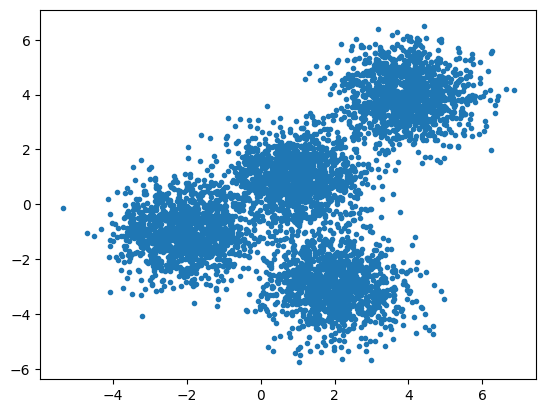

In [186]:
plt.scatter(x[:, 0], x[:, 1], marker=".")

## Setting Up K-Means
#### Init Parameters: 1-"k-means++", 2-"random"

In [187]:
from sklearn.cluster import KMeans

K = 4
k_means = KMeans(init="k-means++", n_clusters=K, n_init=12)
k_means.fit(x)

print(f"K-Means Labels: {k_means.labels_}")
print(f"K-Means Cluster Centers: {k_means.cluster_centers_}")

K-Means Labels: [0 3 3 ... 1 0 0]
K-Means Cluster Centers: [[-2.03743147 -0.99782524]
 [ 3.97334234  3.98758687]
 [ 0.96900523  0.98370298]
 [ 1.99741008 -3.01666822]]


## Plot

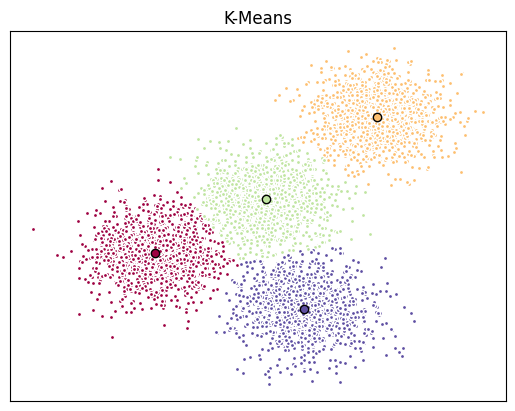

In [188]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))

for k, color in zip(range(K), colors):
    my_members = k_means.labels_ == k
    cluster_centers = k_means.cluster_centers_[k]
    ax.plot(x[my_members, 0], x[my_members, 1], "w", markerfacecolor=color, marker=".")
    ax.plot(cluster_centers[0], cluster_centers[1], "o", markerfacecolor=color, markeredgecolor="k", markersize=6)

ax.set_title("K-Means")
ax.set_xticks(())   # Remove X Axis Ticks
ax.set_yticks(())
plt.show()

<hr>

## Using Real Data

In [189]:
customers_df = pd.read_csv("Cust_Segmentation.csv")
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Preprocessing Data

In [190]:
df = customers_df.drop("Address", axis=1) # Remove Address Column (axis=1 --> column, axis=0 --> row)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Standardizing Data

In [191]:
from sklearn.preprocessing import StandardScaler

x = df.values[:, 1:] # Don't Select Customer Id Column
x = np.nan_to_num(x)

scaler = StandardScaler().fit(x)
x = scaler.transform(x)
print(x[0])

[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
 -0.52379654 -0.57652509]


## K-Means Clustering

In [192]:
from sklearn.cluster import KMeans

K = 3
k_means = KMeans(init="k-means++", n_clusters=k, n_init=12)
k_means.fit(x)

labels = k_means.labels_
centers = k_means.cluster_centers_

print(f"Labels: {labels[:10]}")
print(f"Centers: {centers}")

Labels: [1 0 2 1 0 0 1 1 1 0]
Centers: [[ 9.91773769e-01  2.38756999e-01  1.27421461e+00  1.43518566e+00
   1.24440502e+00  1.43538377e+00 -2.09335587e-01  5.57517111e-01]
 [-1.50796609e-01 -1.15651304e-01 -1.38795179e-01 -2.73411279e-01
  -3.40626044e-01 -3.71502176e-01 -5.23796543e-01 -3.28592133e-01]
 [-3.90439547e-01  1.62695612e-01 -6.79376729e-01 -3.86448408e-01
  -6.83901553e-05 -6.93056978e-02  1.87982575e+00  5.69270845e-01]]


## Insights

In [193]:
df["KM-Cluster"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,KM-Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


## Averages

In [194]:
df.groupby("KM-Cluster").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
KM-Cluster,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


## Plot

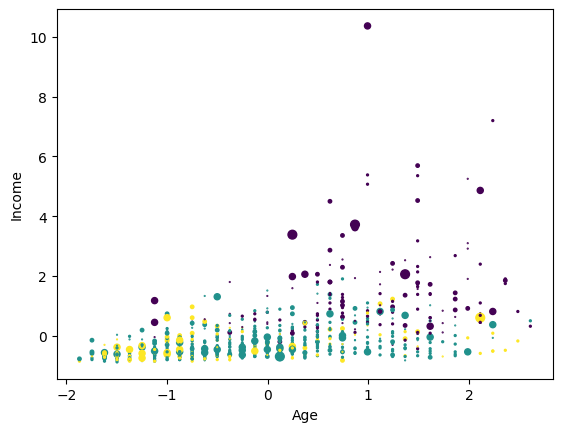

In [195]:
educations = x[:, 1]
areas = np.pi * (educations ** 2)

# Income-Age Plot (the bigger the point, the higher the education)
plt.scatter(x[:, 0], x[:, 3], s=areas, c=labels.astype(np.float64))
plt.ylabel("Income")
plt.xlabel("Age")

plt.show()

## 3D Plot

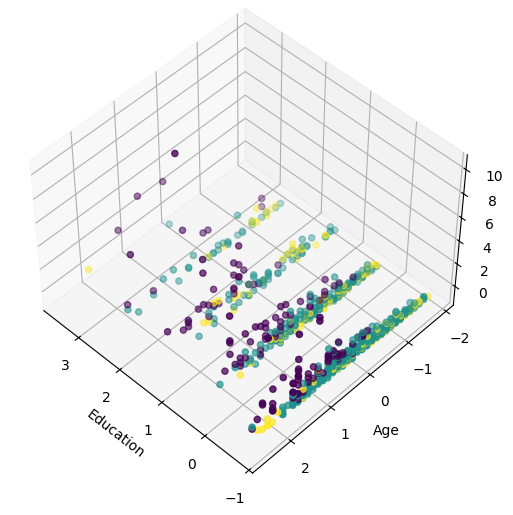

In [196]:
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=48, azim=134)

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c=labels.astype(np.float64))

ax.set_xlabel("Education") # x[:, 1]
ax.set_ylabel("Age")       # x[:, 0]
ax.set_zlabel("Income")    # x[:, 2]

plt.show()